In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import pydotplus
from PIL import Image as PILImage
from io import BytesIO


In [33]:
# Carica il dataset con il separatore corretto
file_path = '/home/lollo/Thesis/Python/data/data_mapped.csv'
data = pd.read_csv(file_path, delimiter=';')

In [34]:
# Encode categorical features
data_encoded = data.copy()

# List categorical columns
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

# Initialize the label encoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply label encoding to each categorical column
for col, encoder in label_encoders.items():
    data_encoded[col] = encoder.fit_transform(data_encoded[col])

# Define the features (X) and the target (y)
X = data_encoded.drop('Target', axis=1)
y = data_encoded['Target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
columns_to_include = [
    'Marital status', 'Application order', 'Admission grade',
    'Gender', 'Age at enrollment', 'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)', 'GDP', 'Target'
]

# Extract the subset of the dataset
data_subset = data_encoded[columns_to_include]

# Define the features (X) and the target (y) for the subset
X_subset = data_subset.drop('Target', axis=1)
y_subset = data_subset['Target']

# Split the subset dataset into training and test sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42)

Optimized DecisionTree Accuracy on all Dataset: 73.45%
Number of features used: 36


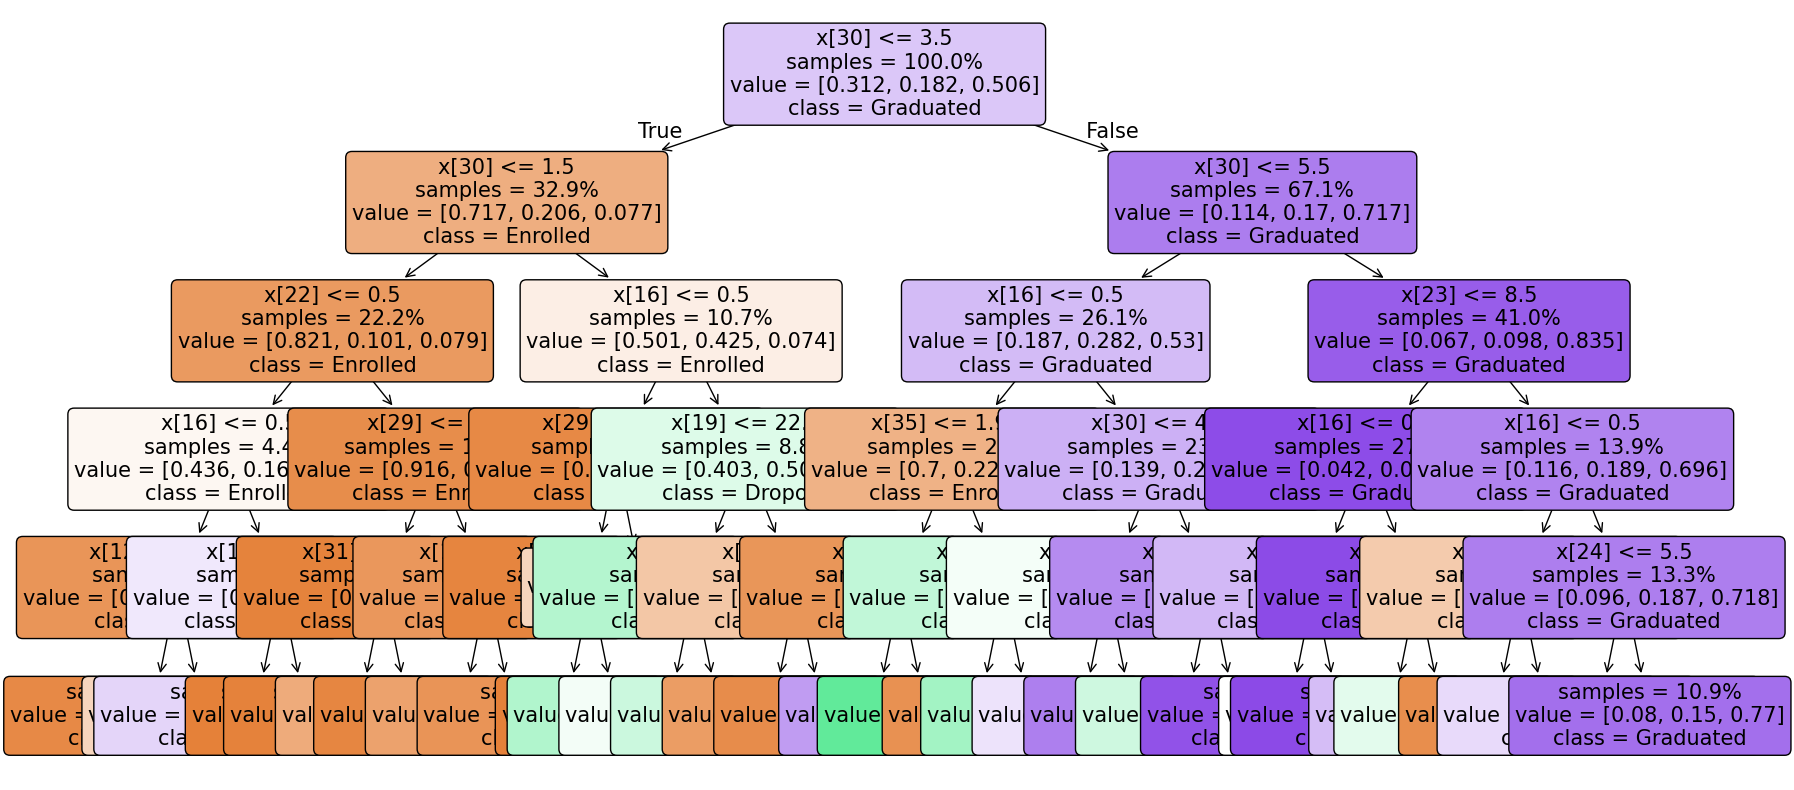

In [36]:
# Decision Tree con GridSearchCV per il pruning
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Optimized DecisionTree Accuracy on all Dataset: {accuracy_dt:.2%}")
# Lista delle caratteristiche usate per il training
feature_names = X.columns.tolist()

# Visualizza senza i nomi delle caratteristiche per identificare il problema
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, 
          class_names=['Enrolled', 'Dropout', 'Graduated'],  # Usa i nomi dei target corretti
          rounded=True, 
          fontsize=15, 
          proportion=True,
          impurity=False)
#plt.show()
print("Number of features used:", best_dt.n_features_in_)

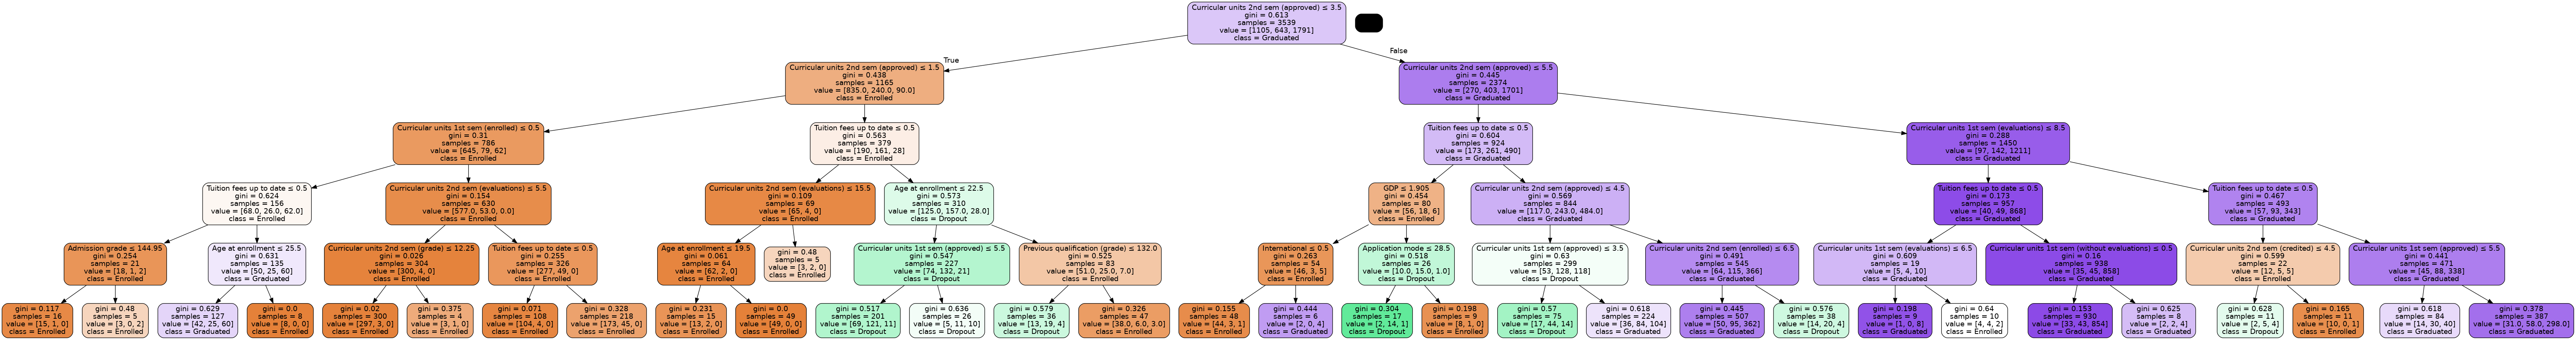

In [37]:
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X.columns.tolist(),  # Usa i nomi delle caratteristiche corrette
                           class_names=['Enrolled', 'Dropout', 'Graduated'],  # Usa i nomi delle classi corrette
                           filled=True, rounded=True,  
                           special_characters=True)  

# Converti il dot in un file grafico
graph = pydotplus.graph_from_dot_data(dot_data)

# Salva l'albero decisionale in un file PDF ad alta risoluzione
graph.write_pdf("decision_tree.pdf")

# Visualizza l'albero come immagine (opzionale)
png_str = graph.create_png()
img = PILImage.open(BytesIO(png_str))
img.show()
# Controlla il numero di caratteristiche usate nel modello



Correct: Enrolled
Predicted: Enrolled
                                                  1255
Marital status                                    4.00
Application mode                                 39.00
Application order                                 1.00
Course                                            6.00
Daytime/evening attendance\t                      1.00
Previous qualification                           15.00
Previous qualification (grade)                  133.10
Nacionality                                      14.00
Mother's qualification                           16.00
Father's qualification                           28.00
Mother's occupation                              15.00
Father's occupation                              24.00
Admission grade                                 110.00
Displaced                                         1.00
Educational special needs                         0.00
Debtor                                            0.00
Tuition fees up to date    

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


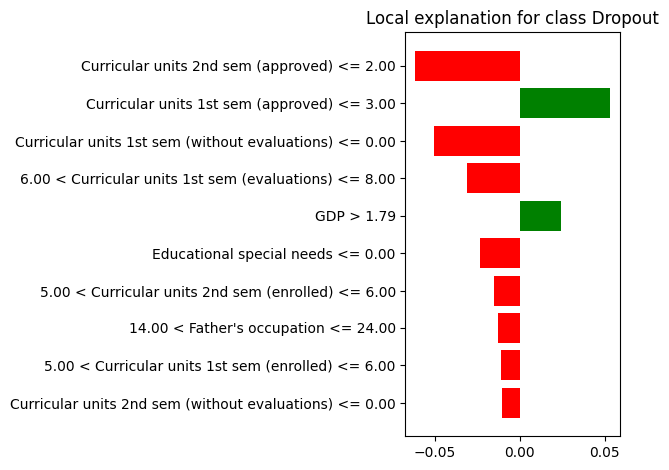

Correct: Graduated
Predicted: Graduated
                                                      3458
Marital status                                    1.000000
Application mode                                 17.000000
Application order                                 1.000000
Course                                           13.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  125.000000
Nacionality                                      14.000000
Mother's qualification                           20.000000
Father's qualification                           20.000000
Mother's occupation                              18.000000
Father's occupation                              28.000000
Admission grade                                 119.800000
Displaced                                         0.000000
Educational special needs                         0.000000
Debtor          

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


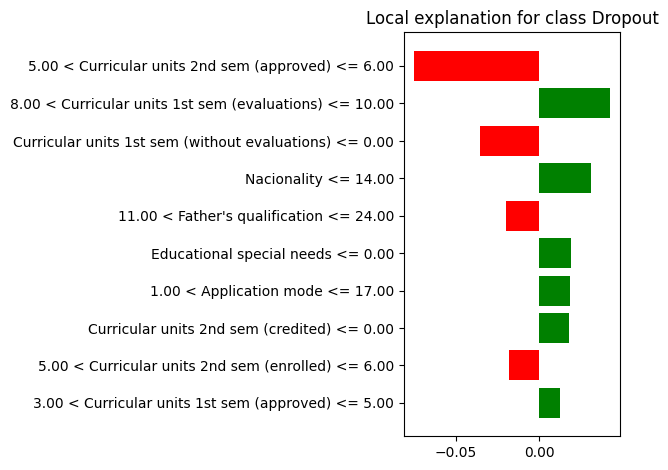

Correct: Graduated
Predicted: Graduated
                                                      3390
Marital status                                    1.000000
Application mode                                 17.000000
Application order                                 1.000000
Course                                            3.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  133.000000
Nacionality                                      14.000000
Mother's qualification                            8.000000
Father's qualification                            9.000000
Mother's occupation                              28.000000
Father's occupation                              41.000000
Admission grade                                 127.400000
Displaced                                         0.000000
Educational special needs                         0.000000
Debtor          

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


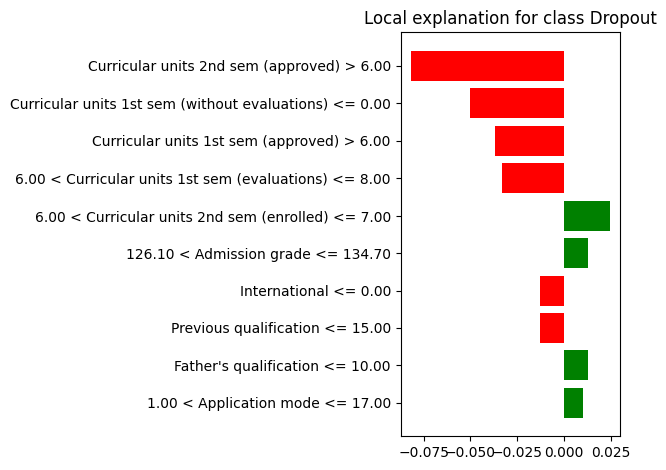

Correct: Graduated
Predicted: Graduated
                                                      1497
Marital status                                    1.000000
Application mode                                 17.000000
Application order                                 2.000000
Course                                            0.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  110.000000
Nacionality                                      14.000000
Mother's qualification                           24.000000
Father's qualification                           28.000000
Mother's occupation                               1.000000
Father's occupation                               3.000000
Admission grade                                 115.300000
Displaced                                         1.000000
Educational special needs                         0.000000
Debtor          

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


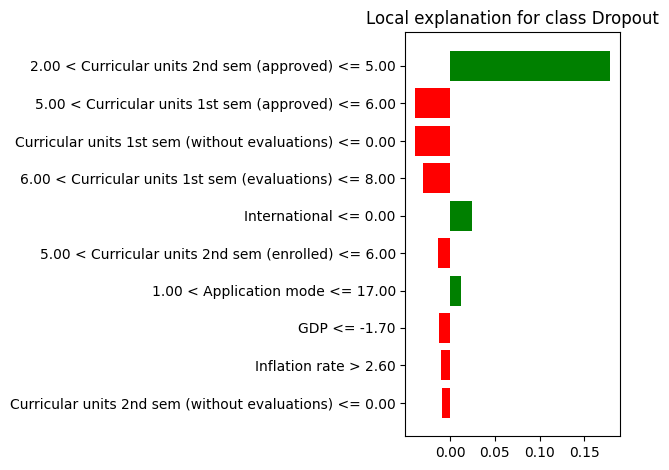

Correct: Enrolled
Predicted: Enrolled
                                                  1536
Marital status                                    1.00
Application mode                                 39.00
Application order                                 1.00
Course                                           11.00
Daytime/evening attendance\t                      1.00
Previous qualification                           15.00
Previous qualification (grade)                  130.00
Nacionality                                      14.00
Mother's qualification                           10.00
Father's qualification                           10.00
Mother's occupation                              28.00
Father's occupation                              14.00
Admission grade                                 106.20
Displaced                                         1.00
Educational special needs                         0.00
Debtor                                            0.00
Tuition fees up to date    

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


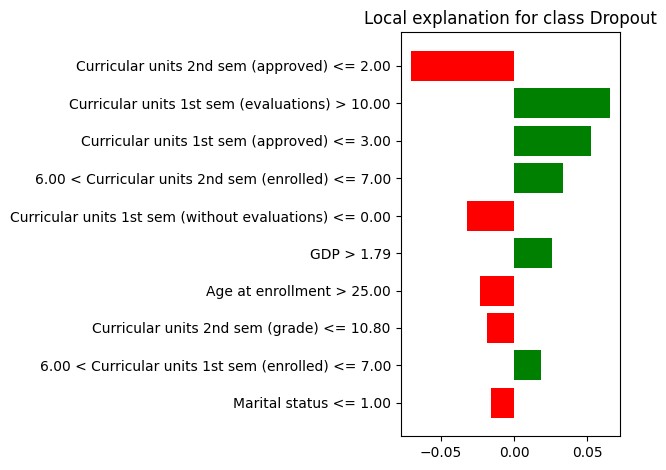

Correct: Graduated
Predicted: Graduated
                                                   287
Marital status                                    1.00
Application mode                                 39.00
Application order                                 1.00
Course                                           14.00
Daytime/evening attendance\t                      0.00
Previous qualification                            1.00
Previous qualification (grade)                  170.00
Nacionality                                      14.00
Mother's qualification                           28.00
Father's qualification                           28.00
Mother's occupation                              13.00
Father's occupation                              34.00
Admission grade                                 101.00
Displaced                                         0.00
Educational special needs                         0.00
Debtor                                            0.00
Tuition fees up to date  

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


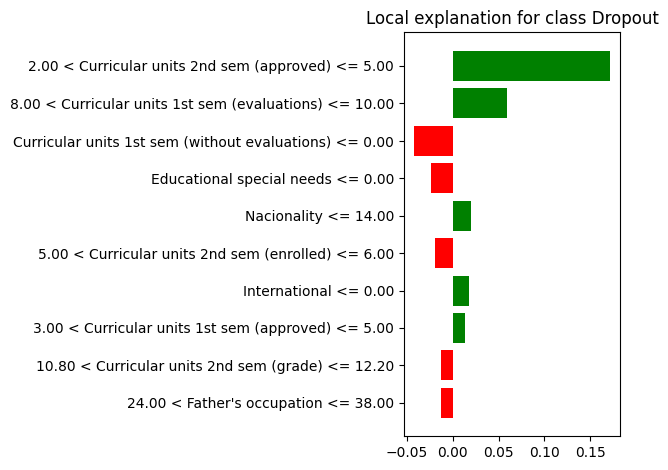

Correct: Dropout
Predicted: Graduated
                                                      3416
Marital status                                    1.000000
Application mode                                  1.000000
Application order                                 1.000000
Course                                            8.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  143.000000
Nacionality                                      14.000000
Mother's qualification                           16.000000
Father's qualification                           20.000000
Mother's occupation                              23.000000
Father's occupation                              24.000000
Admission grade                                 144.800000
Displaced                                         0.000000
Educational special needs                         0.000000
Debtor            

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


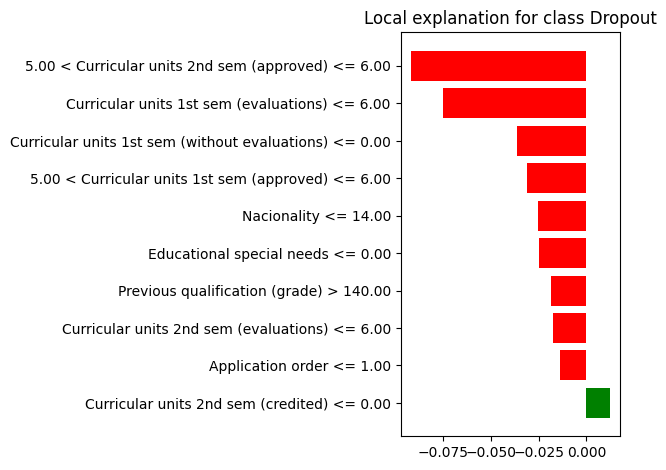

Correct: Enrolled
Predicted: Graduated
                                                      1366
Marital status                                    1.000000
Application mode                                 51.000000
Application order                                 1.000000
Course                                            7.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  136.000000
Nacionality                                      14.000000
Mother's qualification                           24.000000
Father's qualification                           10.000000
Mother's occupation                               8.000000
Father's occupation                              24.000000
Admission grade                                 133.600000
Displaced                                         1.000000
Educational special needs                         0.000000
Debtor           

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


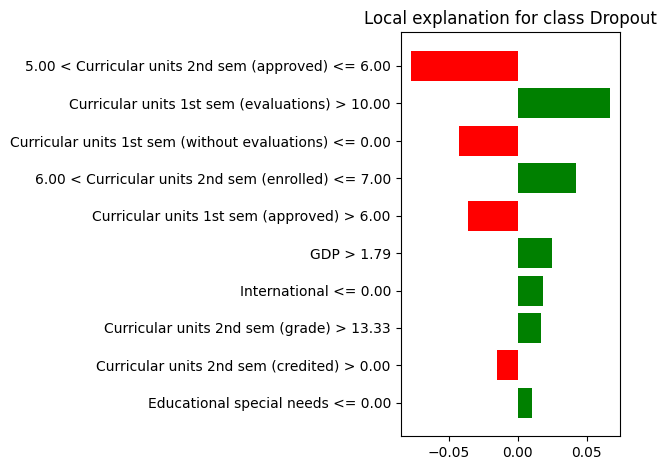

Correct: Graduated
Predicted: Graduated
                                                     3926
Marital status                                    1.00000
Application mode                                 17.00000
Application order                                 5.00000
Course                                           11.00000
Daytime/evening attendance\t                      1.00000
Previous qualification                           15.00000
Previous qualification (grade)                  147.00000
Nacionality                                      14.00000
Mother's qualification                            9.00000
Father's qualification                           28.00000
Mother's occupation                               1.00000
Father's occupation                              15.00000
Admission grade                                 138.50000
Displaced                                         1.00000
Educational special needs                         0.00000
Debtor                          

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


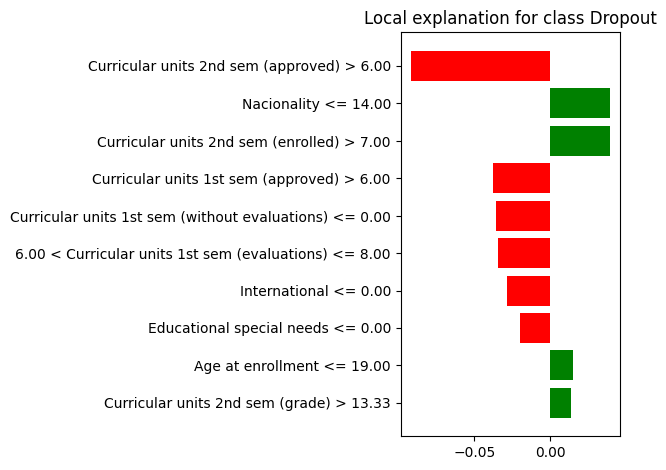

Correct: Graduated
Predicted: Graduated
                                                      1055
Marital status                                    1.000000
Application mode                                  1.000000
Application order                                 1.000000
Course                                           11.000000
Daytime/evening attendance\t                      1.000000
Previous qualification                           15.000000
Previous qualification (grade)                  118.000000
Nacionality                                      14.000000
Mother's qualification                            9.000000
Father's qualification                           10.000000
Mother's occupation                              15.000000
Father's occupation                              30.000000
Admission grade                                 117.800000
Displaced                                         0.000000
Educational special needs                         0.000000
Debtor          

/home/lollo/Thesis/Python/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


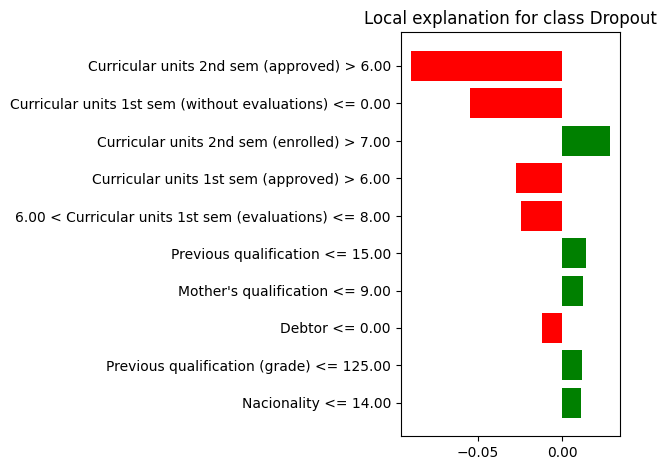

In [42]:
# Creazione dell'explainer LIME
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['Enrolled', 'Dropout', 'Graduated'],
    mode='classification'
)

# Genera spiegazioni per le prime 10 istanze del test set
for i in range(10):
    correct_label_index = y_test.iloc[i]
    correct_label = ['Enrolled', 'Dropout', 'Graduated'][correct_label_index]
    
    # Assicurati che la riga di X_test sia un DataFrame con nomi di colonne
    instance = X_test.iloc[[i]]
    predicted_label_index = best_dt.predict(instance)[0]
    predicted_label = ['Enrolled', 'Dropout', 'Graduated'][predicted_label_index]
    
    print('Correct:', correct_label)
    print('Predicted:', predicted_label)
    print(instance.T)  # Mostra le caratteristiche per l'istanza attuale
    
    explanation = explainer.explain_instance(
        data_row=X_test.iloc[i].values,
        predict_fn=best_dt.predict_proba,
        num_features=10
    )

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()